In [3]:
import sklearn
from sklearn.preprocessing import *
import numpy as np
from numpy import *

# pip install sklearn


def normalization(data):
    data_mm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    return data_mm


def numpy_standardization(data):
    """
    (각데이터 - 평균(각열)) / 표준편차(각열)
    """
    std_data = (data - np.mean(data, axis=0) / np.std(data, axis=0))
    return std_data


def main():
    data = np.random.randint(30, size=(6, 5))
    # print(data)
    std_data_temp = numpy_standardization(data)
    print(std_data_temp)

    no_data = normalization(data)
    print(no_data)


if __name__ == '__main__':
    main()

[[ 1.58666644  0.77964054  0.46268455 24.68428921  0.43113076]
 [ 2.58666644 -1.22035946 19.46268455  4.68428921 19.43113076]
 [26.58666644 21.77964054 12.46268455  5.68428921  6.43113076]
 [ 8.58666644 14.77964054 22.46268455 -0.31571079  4.43113076]
 [11.58666644 25.77964054  1.46268455 24.68428921  8.43113076]
 [25.58666644  5.77964054 10.46268455  9.68428921  6.43113076]]
[[0.         0.07407407 0.         1.         0.        ]
 [0.04       0.         0.86363636 0.2        1.        ]
 [1.         0.85185185 0.54545455 0.24       0.31578947]
 [0.28       0.59259259 1.         0.         0.21052632]
 [0.4        1.         0.04545455 1.         0.42105263]
 [0.96       0.25925926 0.45454545 0.4        0.31578947]]


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)
# 99%의 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_pca.shape[1])

원본 특성 개수 :  64
줄어든 특성 개수 :  54


원본 특성 개수 :  64
줄어든 특성 개수 :  54


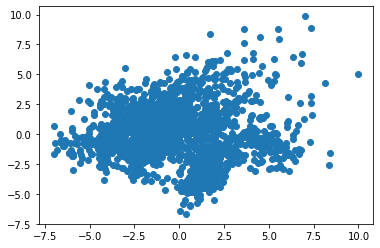

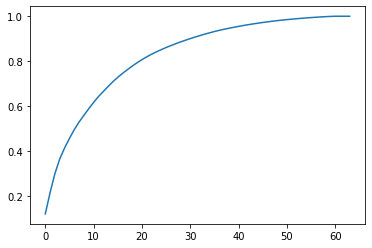

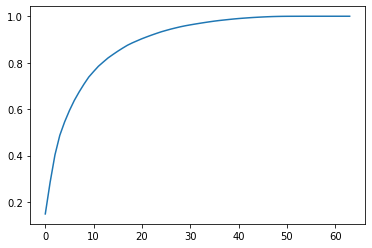

In [4]:
# 주성분을 사용해 특성 줄이기
# 사이킷런 손글씨 데이터를 활용하여 특성 행렬을 표준화 처리 및 주성분 특성 줄이기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()  # 8x8 크기의 손글씨 숫자 데이터 로드
# 특성 행렬을 표준화 처리
features = StandardScaler().fit_transform(digits.data)
# 99% 의 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_pca.shape[1])

# # 주성분에 투영된 처음 두 개의 특성을 사용해 산점도 출력
# plt.scatter(features_pca[:, 0], features_pca[:, 1])
# plt.show()

# 화이트닝
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

# 특성 행렬을 주성분에 투영하려면 components_ 배열 전치하여 행렬곱을 수행합니다.
# 넘파이 allclose()를 사용하여 features_nowhiten 배열과 동일한지 확인
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


# 넘파이 cumsum()를 사용하여 분산을 누적하여 그래프 출력
# 대략 30개의 주성분으로도 80이상의 분산을 유지
# 표준화하지 않은 원본 데이터 사용
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


In [5]:
# 선형적으로 구분되지 않는 데이터차원 축소
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(
    n_samples=1000, random_state=1, noise=0.1, factor=0.1)
print(features)

# 방사 기저 함수 (radius basis function, RBF)를 사용하여 커널 PCA 적용
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_kpca.shape[1])


[[ 0.23058395 -0.10671314]
 [-0.0834218  -0.22647078]
 [ 0.9246533  -0.71492522]
 ...
 [ 0.02517206  0.00964548]
 [-0.92836187  0.06693357]
 [ 1.03502248  0.54878286]]
원본 특성 개수 :  2
줄어든 특성 개수 :  1


In [6]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()  # 붓꽃 데이터셋을 로드
features = iris.data
target = iris.target

# LAD 객체 만들고 실행하여 특성을 변환합니다 .
lda = LinearDiscriminantAnalysis(n_components=None)
features_lad = lda.fit(features, target)

# print("원본 특성 개수 : ", features.shape[1])
# print("줄어든 특성 개수 : ", features_lad.shape[1])

# 설명된 분산의 비율이 담긴 배열을 저장
lda_var_ratios = lda.explained_variance_ratio_
print(lda_var_ratios)


def select_n_components(var_ratio, goal_var: float) -> int:
    total_variances = 0.0  # 설명된 분산의 초기값을 지정
    n_components = 0  # 특성 개수의 초기값을 지정

    for explained_variance in var_ratio:  # 각 특성 의 성명된 분산을 순회 Loop
        total_variances += explained_variance  # 설명된 분산 값을 누적
        n_components += 1  # 성분 개수를 카운트
        if total_variances >= goal_var:  # 설명된 분산이 목표치에 도달하면 반복을 종료
            break
    return n_components  # 성분 개수를 반환


temp = select_n_components(lda_var_ratios, 0.95)
print("temp = ", temp)


[0.9912126 0.0087874]
temp =  1


In [7]:
# 순서가 없는 범주형 특성 인코딩
# 사이킷런의 LabelBinarizer를 사용하여 문자열 타깃 데이터를 원-핫 인코딩
# 하나의 값으로 처리 된 모습
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

feature = np.array([["Texas"],
                    ["California"],
                    ["awdv"],
                    ["Delaware"],
                    ["Texas"]])
print(feature)  # 특성 데이터 생성

one_hot = LabelBinarizer()  # 원한 인코더 생성
one_hot.fit_transform(feature)  # 특성을 원-핫 인코딩 변환
print(one_hot.classes_)  # ['California' 'Delaware' 'Texas']
one_hot_data = one_hot.inverse_transform(one_hot.transform(feature))
# ['Texas' 'California' 'Texas' 'Delaware' 'Texas']
print("one_hot >> ", one_hot_data)


[['Texas']
 ['California']
 ['awdv']
 ['Delaware']
 ['Texas']]
['California' 'Delaware' 'Texas' 'awdv']
one_hot >>  ['Texas' 'California' 'awdv' 'Delaware' 'Texas']


In [8]:
# MultiLabelBinarizer
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

multiclass_feature = [("Texas", "Florida"),
                      ("California", "alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Florida"), ]
# print(multiclass_feature)  # 특성 데이터 생성

one_hot_multiclass = MultiLabelBinarizer()  # 다중 클래스 원-핫 인코더 객체 생성
one_hot_multiclass.fit_transform(multiclass_feature)  # 다중 클래스 특성을 원-핫 인코더 실행

one_hot_multiclass_classes = one_hot_multiclass.classes_

one_hot_data = one_hot_multiclass.inverse_transform(
    one_hot_multiclass.transform(multiclass_feature))

print("classes >> ", one_hot_multiclass_classes)
print("one_hot_data >> ", one_hot_data)
"""
결과 
classes >>  ['California' 'Delware' 'Florida' 'Texas' 'alabama']
one_hot_data >>  [('Florida', 'Texas'), ('California', 'alabama'), ('Florida', 'Texas'), ('Delware', 'Florida'), ('Florida', 'Texas')]
"""


classes >>  ['California' 'Delware' 'Florida' 'Texas' 'alabama']
one_hot_data >>  [('Florida', 'Texas'), ('California', 'alabama'), ('Florida', 'Texas'), ('Delware', 'Florida'), ('Florida', 'Texas')]


"\n결과 \nclasses >>  ['California' 'Delware' 'Florida' 'Texas' 'alabama']\none_hot_data >>  [('Florida', 'Texas'), ('California', 'alabama'), ('Florida', 'Texas'), ('Delware', 'Florida'), ('Florida', 'Texas')]\n"

In [9]:
# 순서가 없는 범주형 데이터 처리
# 사이킷런의 LabelBinarize를 사용하여 문자열 타깃 데이터 원 - 핫 인코딩 진행
import numpy as np
from sklearn.preprocessing import OneHotEncoder

feature = np.array([["Texas", 1], ["California", 1],
                   ["Texas", 3], ["Delaware", 1], ["Texas", 1]])
print(feature)
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit_transform(feature)
one_hot_encoder_data = one_hot_encoder.categories_  # 클래스 확인


[['Texas' '1']
 ['California' '1']
 ['Texas' '3']
 ['Delaware' '1']
 ['Texas' '1']]


In [10]:
# 판다스 데이터프레임의 replace()를 사용하여 문자열 레이블을 수치값으로 변환합니다.
import pandas as pd

dataframe = pd.DataFrame(
    {"Score": ["Low", "Low", "Medium", "Medium", "High"]})  # 특성 데이터 생성
scale_mapper = {"Low": 1,
                "Medium": 2,
                "High": 3}  # 매핑 딕셔너리 생성
dataframe["Score"].replace(scale_mapper)  # 특성을 정수로 변환
dataframe = pd.DataFrame(
    {"Score": ["Low", "Low", "Medium", "Medium", "High", "Barely More Than Medium"]})
scale_mapper = {"Low": 1,
                "Medium": 2,
                "Barely More Than Medium": 3,
                "High": 4}  # 매핑 딕셔너리 생성
data = dataframe["Score"].replace(scale_mapper)  # 특성을 정수로 변환
print(data)


0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64


In [11]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

features = np.array([["Low", 10], ["High", 50], ["Medium", 3]])
ordinal_encoding = OrdinalEncoder()
ordinal_encoding.fit_transform(features)
ordinal_encoding_data = ordinal_encoding.categories_

print("ordinal_encoding.categories_", ordinal_encoding_data)


ordinal_encoding.categories_ [array(['High', 'Low', 'Medium'], dtype='<U21'), array(['10', '3', '50'], dtype='<U21')]


In [12]:
# 딕셔너리 특성 행렬로 변환
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"Red": 2, "Blue": 4},
             {"Red": 4, "Blue": 3},
             {"Red": 1, "Yellow": 2},
             {"Red": 2, "Yellow": 2}
             ]
# print(data_dict)
# [{'Red': 2, 'Blue': 4}, {'Red': 4, 'Blue': 3}, {'Red': 1, 'Yellow': 2}, {'Red': 2, 'Yellow': 2}]
dictvectorizer = DictVectorizer(sparse=False)
# 0아닌 원소만 저장하는 희소 행렬을 반환
# 딕셔너리를 특성 행렬로 변환
features = dictvectorizer.fit_transform(data_dict)
features_names = dictvectorizer.get_feature_names()  # 특성 이름 획득 가능
# print(features_names)
dict_data = pd.DataFrame(features, columns=features_names)
print(dict_data)

# 행렬 형태
# 단어 카운트 딕셔너리 만들기
doc_1_word_count = {"Red": 2, "Blue": 4}
doc_2_word_count = {"Red": 4, "Blue": 4}
doc_3_word_count = {"Red": 1, "Yellow": 2}
doc_4_word_count = {"Red": 2, "Yellow": 2}
doc_word_counts = [doc_1_word_count, doc_2_word_count,
                   doc_3_word_count, doc_4_word_count]
print(doc_word_counts)

data_array = dictvectorizer.fit_transform(doc_word_counts)
print(data_array)


   Blue  Red  Yellow
0   4.0  2.0     0.0
1   3.0  4.0     0.0
2   0.0  1.0     2.0
3   0.0  2.0     2.0
[{'Red': 2, 'Blue': 4}, {'Red': 4, 'Blue': 4}, {'Red': 1, 'Yellow': 2}, {'Red': 2, 'Yellow': 2}]
[[4. 2. 0.]
 [4. 4. 0.]
 [0. 1. 2.]
 [0. 2. 2.]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

x_input = np.array([[0, 2.10, 1.45],
                    [1, 1.18, 1.33],
                    [0, 1.22, 1.27],
                    [1, -0.21, -1.19]])
# 범주형 특성을 가진 행렬 생성
print(x_input)

x_with_nan = np.array([[np.nan, 0.87, 1.31], [np.nan, -0.67, -0.22]])
clf = KNeighborsClassifier(3, weights="distance")  # KNN 객체 생성
trained_model = clf.fit(x_input[:, 1:], x_input[:, 0])  # 훈련
imputed_val = trained_model.predict(x_with_nan[:, 1:])  # 누락된 값의 클래스를 예측
x_with_imputed = np.hstack((imputed_val.reshape(-1, 1), x_with_nan[:, 1:]))
data = np.vstack((x_with_imputed, x_input))  # 두 특성 행렬을 연결
print(data)


[[ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]
[[ 0.    0.87  1.31]
 [ 1.   -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]


In [14]:
# 누락된 클래스 값 대처 하기 -2
# 누락된 값을 특성에 가장 자주 등장하는 값으로 채우기
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
x = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])
# 범주형 특성을 가진 행렬 생성
# 범주형 특성에 누락된 값이 있는 특성 행렬 만들기
x_with_nan = np.array([[np.nan, 0.87, 1.31], [np.nan, -0.67, -0.22]])
clf = KNeighborsClassifier(3, weights="distance")  # KNN 객체 생성
trained_model = clf.fit(x[:, 1:], x[:, 0])  # 훈련
imputed_val = trained_model.predict(x_with_nan[:, 1:])  # 누락된 값의 클래스를 예측
x_with_imputed = np.hstack((imputed_val.reshape(-1, 1), x_with_nan[:, 1:]))
data = np.vstack((x_with_imputed, x))  # 두 특성 행렬을 연결

# 누락된 클래스 값 대처하기 -02
# 두개의 특성 행렬로 합침
# 누락된 값을 특성에서 가장 자주 등장하는 값으로 채우기
x_complete = np.vstack((x_with_nan, x))
imputer = SimpleImputer(strategy="most_frequent")
data_imputer = imputer.fit_transform(x_complete)
print(data_imputer)


[[ 0.    0.87  1.31]
 [ 0.   -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]


In [15]:
# 텍스트 데이터 처리 01
import re
text_data = [" Interrobang. By Aishwarya Henriette",
             "Parking and going. By Kear Gua",
             "Today Is the night. By Jar par"]

# 공백 제거
strip_whitespace = [string.strip() for string in text_data]
print("공백 제거 >> ", strip_whitespace)

# 마침표 제거
remove_periods = [string.replace(".", "") for string in strip_whitespace]
print("마침표 제거 >> ", remove_periods)
"""
결과 
공백 제거 >>  ['Interrobang. By Aishwarya Henriette', 'Parking and going. By Kear Gua', 'Today Is the night. By Jar par']
마침표 제거 >>  ['Interrobang By Aishwarya Henriette', 'Parking and going By Kear Gua', 'Today Is the night By Jar par']
"""


def capitalizer(string: str) -> str: return string.upper()
# ['INTERROBANG BY AISHWARYA HENRIETTE', 'PARKING AND GOING BY KEAR GUA', 'TODAY IS THE NIGHT BY JAR PAR']


temp = [capitalizer(string) for string in remove_periods]
print(temp)


def replace_letters_with_X(string: str) -> str:
    return re.sub(r"[a-zA-Z]", "X", string)


data = [replace_letters_with_X(string) for string in remove_periods]
print(data)


공백 제거 >>  ['Interrobang. By Aishwarya Henriette', 'Parking and going. By Kear Gua', 'Today Is the night. By Jar par']
마침표 제거 >>  ['Interrobang By Aishwarya Henriette', 'Parking and going By Kear Gua', 'Today Is the night By Jar par']
['INTERROBANG BY AISHWARYA HENRIETTE', 'PARKING AND GOING BY KEAR GUA', 'TODAY IS THE NIGHT BY JAR PAR']
['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX', 'XXXXXXX XXX XXXXX XX XXXX XXX', 'XXXXX XX XXX XXXXX XX XXX XXX']
